In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers Data:")
print(customers.head())
print(customers.info())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [4]:
print("Products Data:")
print(products.head())
print(products.info())

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [5]:
print("Transactions Data:")
print(transactions.head())
print(transactions.info())

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 no

In [6]:
#checking missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
#converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [8]:
#checking unique values
unique_customers = customers['CustomerID'].nunique()
unique_products = products['ProductID'].nunique()
unique_transactions = transactions['TransactionID'].nunique()

(unique_customers, unique_products, unique_transactions)

(200, 100, 1000)

In [9]:
#value counts for categorical columns
region_counts = customers['Region'].value_counts()
product_categories = products['Category'].value_counts()

(region_counts, product_categories)

(Region
 South America    59
 Europe           50
 North America    46
 Asia             45
 Name: count, dtype: int64,
 Category
 Books          26
 Electronics    26
 Clothing       25
 Home Decor     23
 Name: count, dtype: int64)

In [10]:
#joining datasets for enhanced insights
merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products, on='ProductID', how='left')
print(merged_df.head())
print(merged_df.info())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

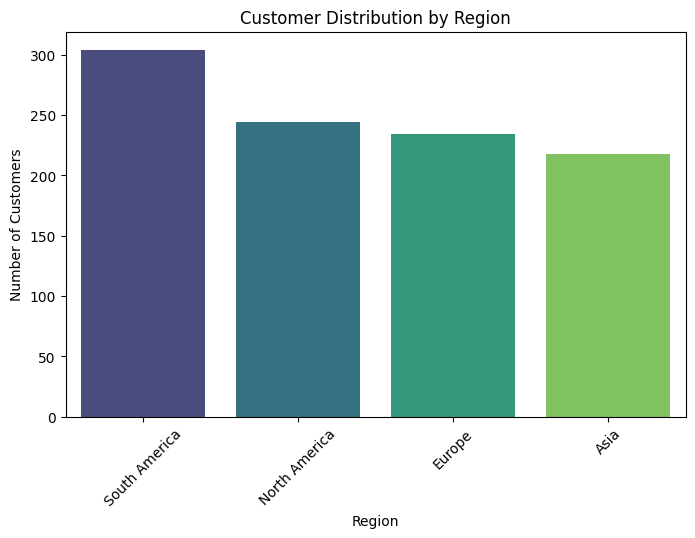

In [11]:
#1. Regional Customer Distribution
region_counts = merged_df['Region'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette='viridis', legend=False)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

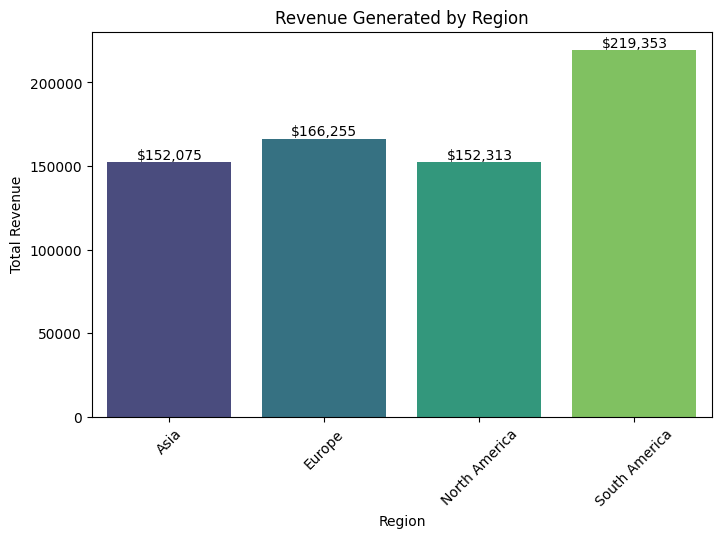

In [12]:
#2. Regional Revenue Distribution
region_revenue = merged_df.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, hue=region_revenue.index, palette='viridis', legend=False)
plt.title("Revenue Generated by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
for i, val in enumerate(region_revenue.values):
    plt.text(i, val, f'${val:,.0f}', ha='center', va='bottom', fontsize=10)
plt.show()

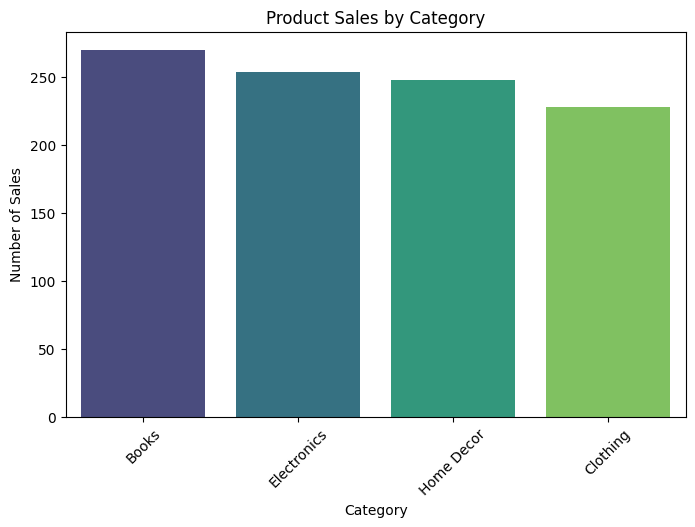

In [13]:
#3. Top Product Categories
category_counts = merged_df['Category'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis', legend=False)
plt.title("Product Sales by Category")
plt.xlabel("Category")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()

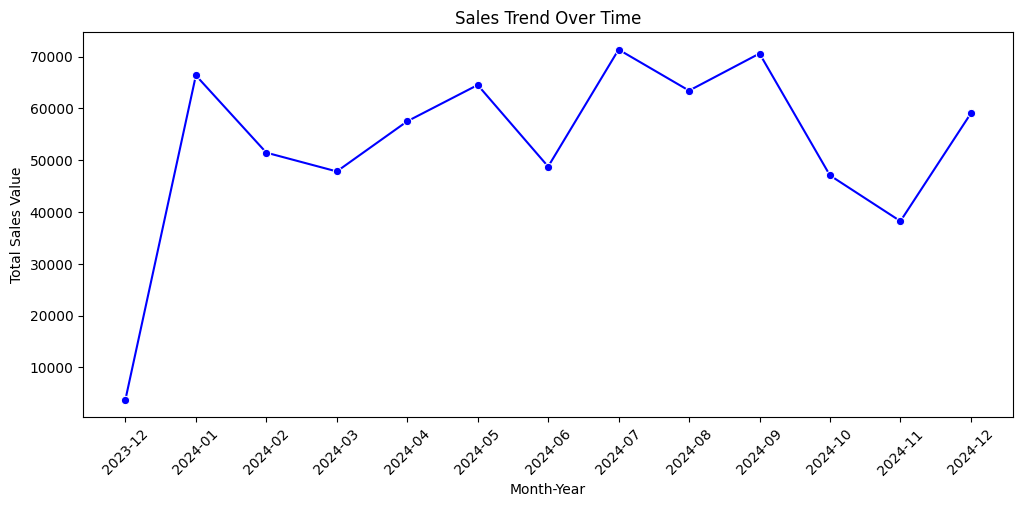

In [14]:
#4. Sales Trend Over Time (Monthly)
merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')
sales_trend = merged_df.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12,5))
sns.lineplot(x=sales_trend.index.astype(str), y=sales_trend.values, marker='o', color='blue')
plt.title("Sales Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45)
plt.show()

In [15]:
#5. Top 10% High-Value Customers
customer_revenue = merged_df.groupby('CustomerID')['TotalValue'].sum()
top_10_percent = customer_revenue.nlargest(int(len(customer_revenue) * 0.1))
print("Top 10% Customers by Revenue:")
print(top_10_percent)

#Customer Average Spend
customer_avg_spend = merged_df.groupby('CustomerID')['TotalValue'].sum()
avg_spend_per_customer = customer_avg_spend.mean()
print(f"The average spend per customer is ${avg_spend_per_customer:.2f}.")

Top 10% Customers by Revenue:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
C0087     6604.23
C0104     6579.10
C0175     6210.53
C0041     6149.78
C0102     6132.36
C0096     6072.92
C0143     6044.63
C0045     6021.80
C0013     6000.56
Name: TotalValue, dtype: float64
The average spend per customer is $3467.31.


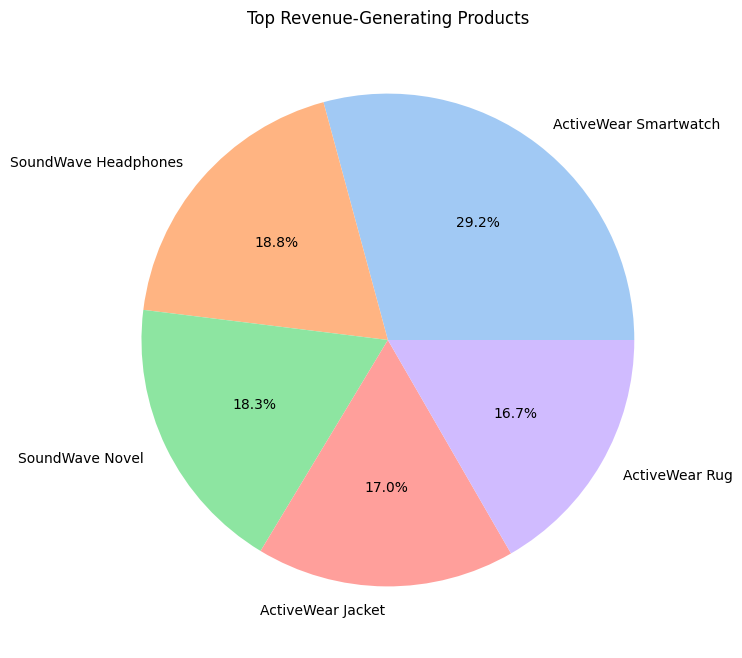

In [16]:
#6. Top Revenue-Generating Products
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(5)
plt.figure(figsize=(8,8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Top Revenue-Generating Products")
plt.show()